# Examples of using `pylabeladjust`
First we do some imports...

In [1]:
# !conda create -n pylabeladjust_development_env python=3.8
# !conda activate pylabeladjust_development_env


In [2]:
# !conda install pandas numpy matplotlib
# !conda install tqdm imageio
# !pip install opinionated

In [3]:
# Import standards:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm.notebook import tqdm
import shutil
import imageio
from IPython.display import Image, display



import textwrap # it wraps text! :)


# Import opinionated for nicer plots:
import opinionated
plt.style.use("opinionated_rc")
import colormaps as cmaps 

# Autoreload, for development:
%load_ext autoreload
%autoreload 2


# Import the pylabeladjust-functions:
from pylabeladjust import adjust_labels,adjust_texts,plot_rectangles




Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

# Example 1: adjust Texts
To show how pylabeladjust works, we load some sample-data from a recent project of mine:

In [4]:
data = pd.read_csv("data/EPSA23_example.csv")
display(data)

Unnamed: 0         x         y  \
0             0  5.606269  7.490148   
1             1  5.617779  3.731517   
2             2  5.327194  6.771035   
3             3  5.788806  9.482959   
4             4  5.689692  9.656334   
..          ...       ...       ...   
190         190  4.746625  2.385326   
191         191  5.259864  3.196076   
192         192  6.902723  4.990467   
193         193  6.407291  3.812750   
194         194  4.290433  5.820129   

                                                 title  fontsize fontweight  
0                                On probability theory       5.1       bold  
1                  The Nature of Research Environments       5.7       bold  
2              Modalities In Scientific Representation       5.7       bold  
3    A Categoricity Problem For Quantum Inferentialism       4.2     normal  
4    Perspectivist Account of Truth-Theoretic Seman...       4.2     normal  
..                                                 ...       ...        ...  
190   Discrimination, Measurement and Normative Theory       5.7       bold  
191                                     Loving Science       4.2     normal  
192  Literature Navigation Systems: An Epistemologi...       4.2     normal  
193                      What Makes Research Relevant?       4.2     normal  
194  Causation and Causal Models—how To Overcome Th...       5.7       bold  

[195 rows x 6 columns]

Here's what that data would look like plotted directly. We notice unightly overlaps.

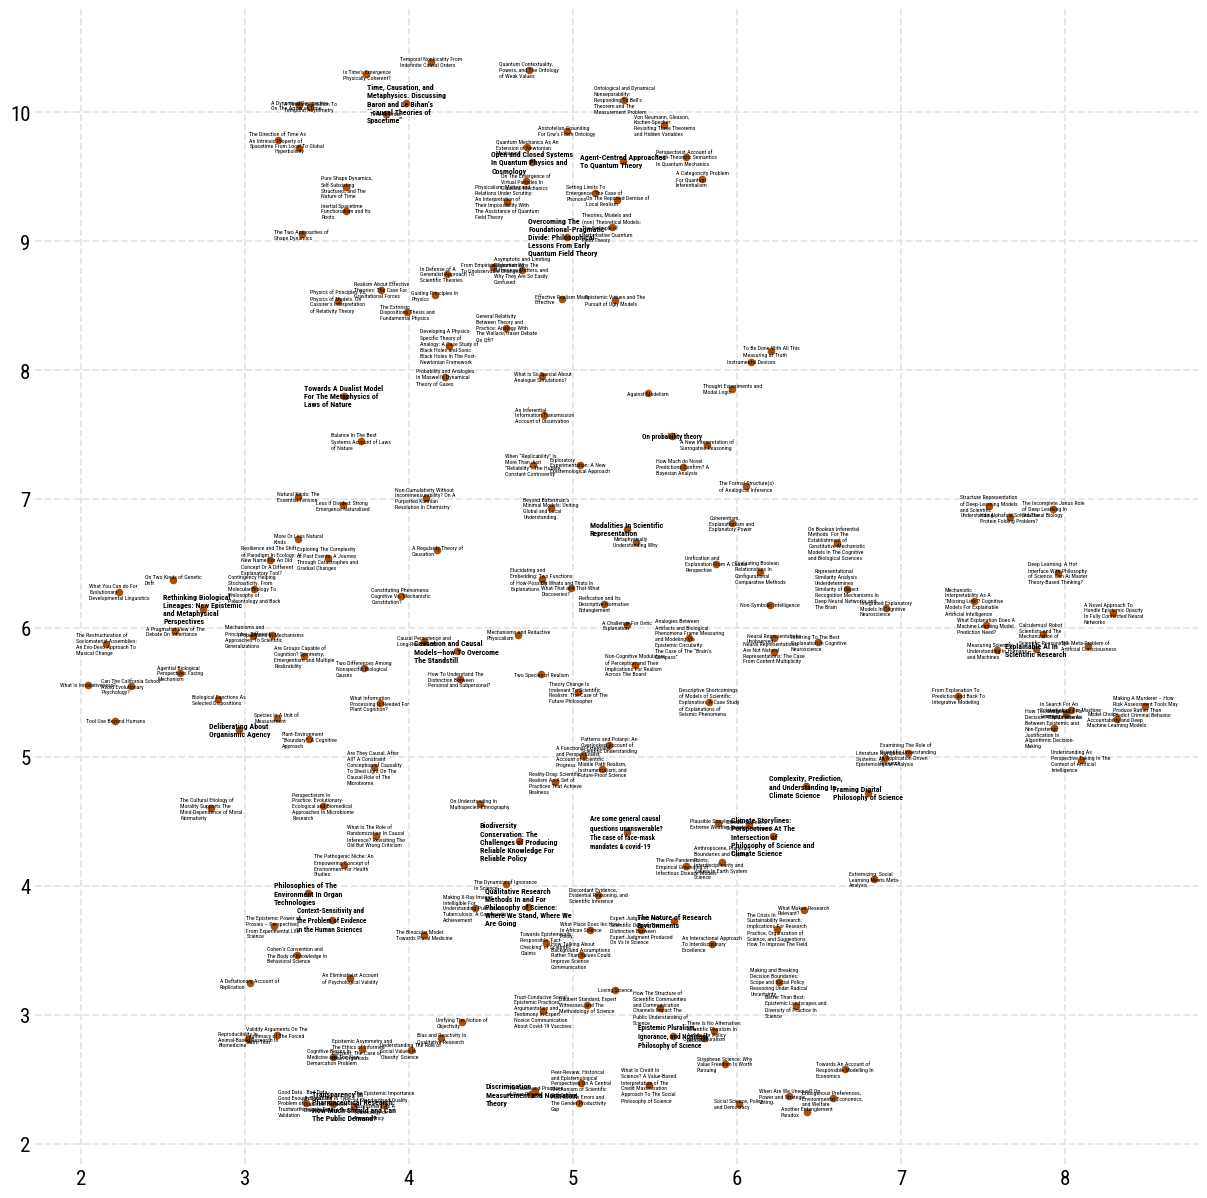

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(data['x'], data['y'], s=20, alpha=1., c='#a7510f')
texts = []
for i, row in data.iterrows():
    texts.append(ax.text(row['x'], row['y'], textwrap.fill(row['title'],25) , fontsize=row['fontsize'],fontweight=row['fontweight'],zorder=10,
                         ha='center',va='center', 
                         ma='left'))


Now, let's apply `adjust_texts`:

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
center center
cen

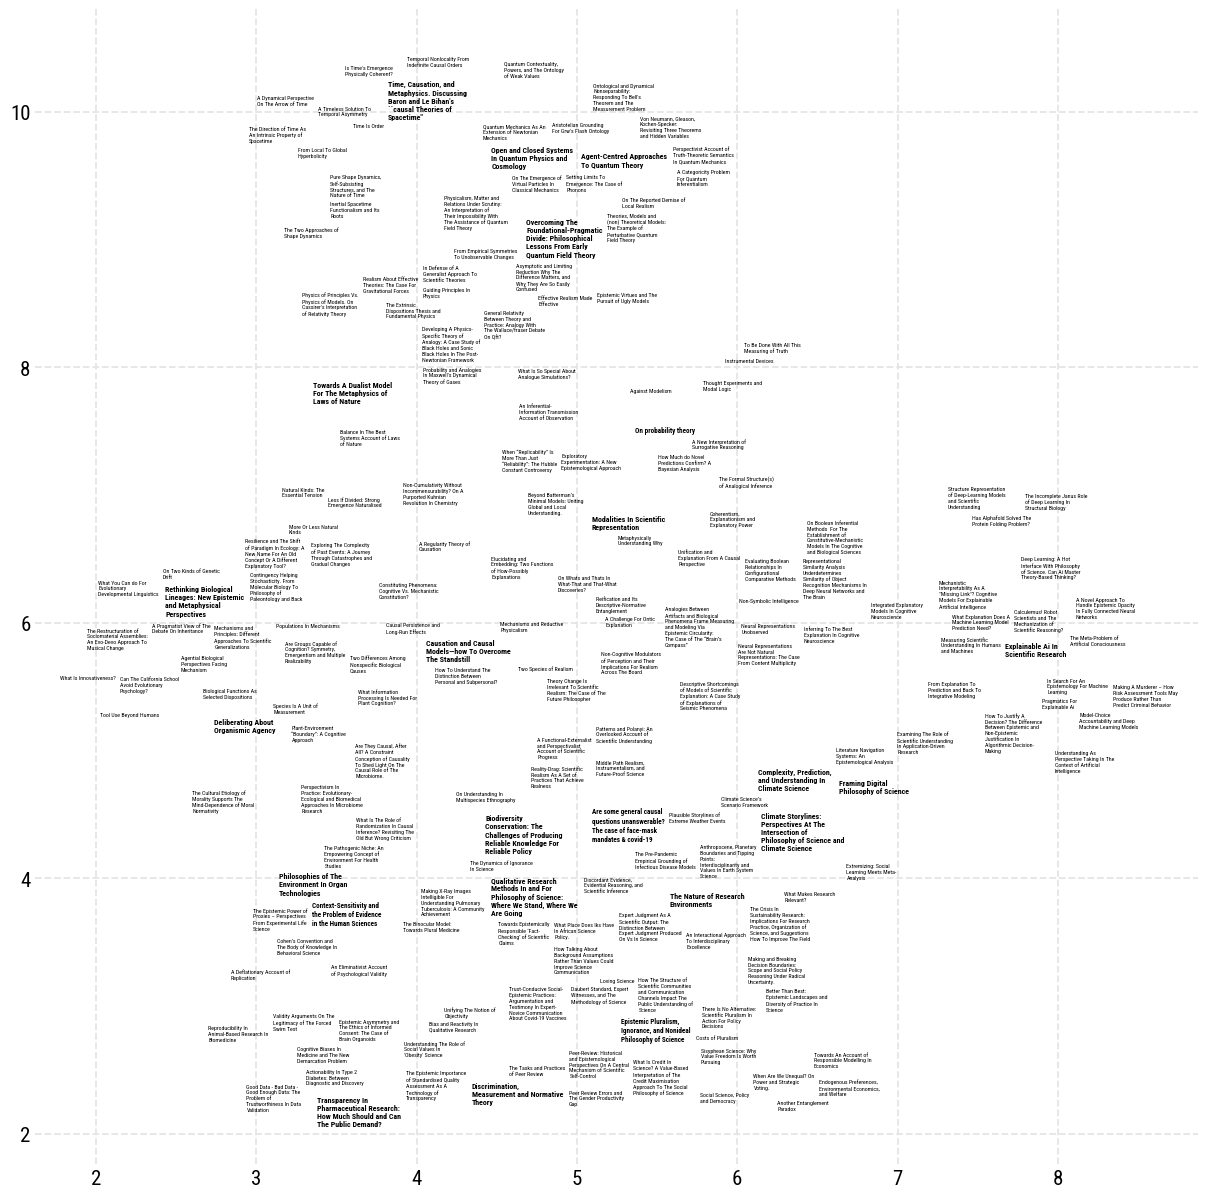

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(data['x'], data['y'], s=20, alpha=0.0, c='#a7510f')

texts = []
for i, row in data.iterrows():
    texts.append(ax.text(row['x'], row['y'], textwrap.fill(row['title'],25) , fontsize=row['fontsize'],fontweight=row['fontweight'],zorder=10,
                        ha='center',va='center', 
                         ma='left'))
fig.canvas.draw()

rectangles_adjusted, optimization_progress_texts = adjust_texts(texts,speed=.03,max_iterations=500, adjust_by_size=True, 
                                                                margin=4.5,radius_scale=1.03, return_optimization_process=True)

ax.scatter(rectangles_adjusted['x'], rectangles_adjusted['y'], s=20, alpha=0.0, c='#d6b4fc')

# Save the figure with good DPI
plt.savefig('images/text_adjustment_result.png', dpi=300)
plt.show()



Much more readable, I think! Note, btw. how using a narrow font lets us get away with only few adjustments. A good diagnostic to see whether your layout is close enough to what you expect is to link the original and the new points with arrows. I think the example below is quite satisfying, with only a few texts considerably moved.

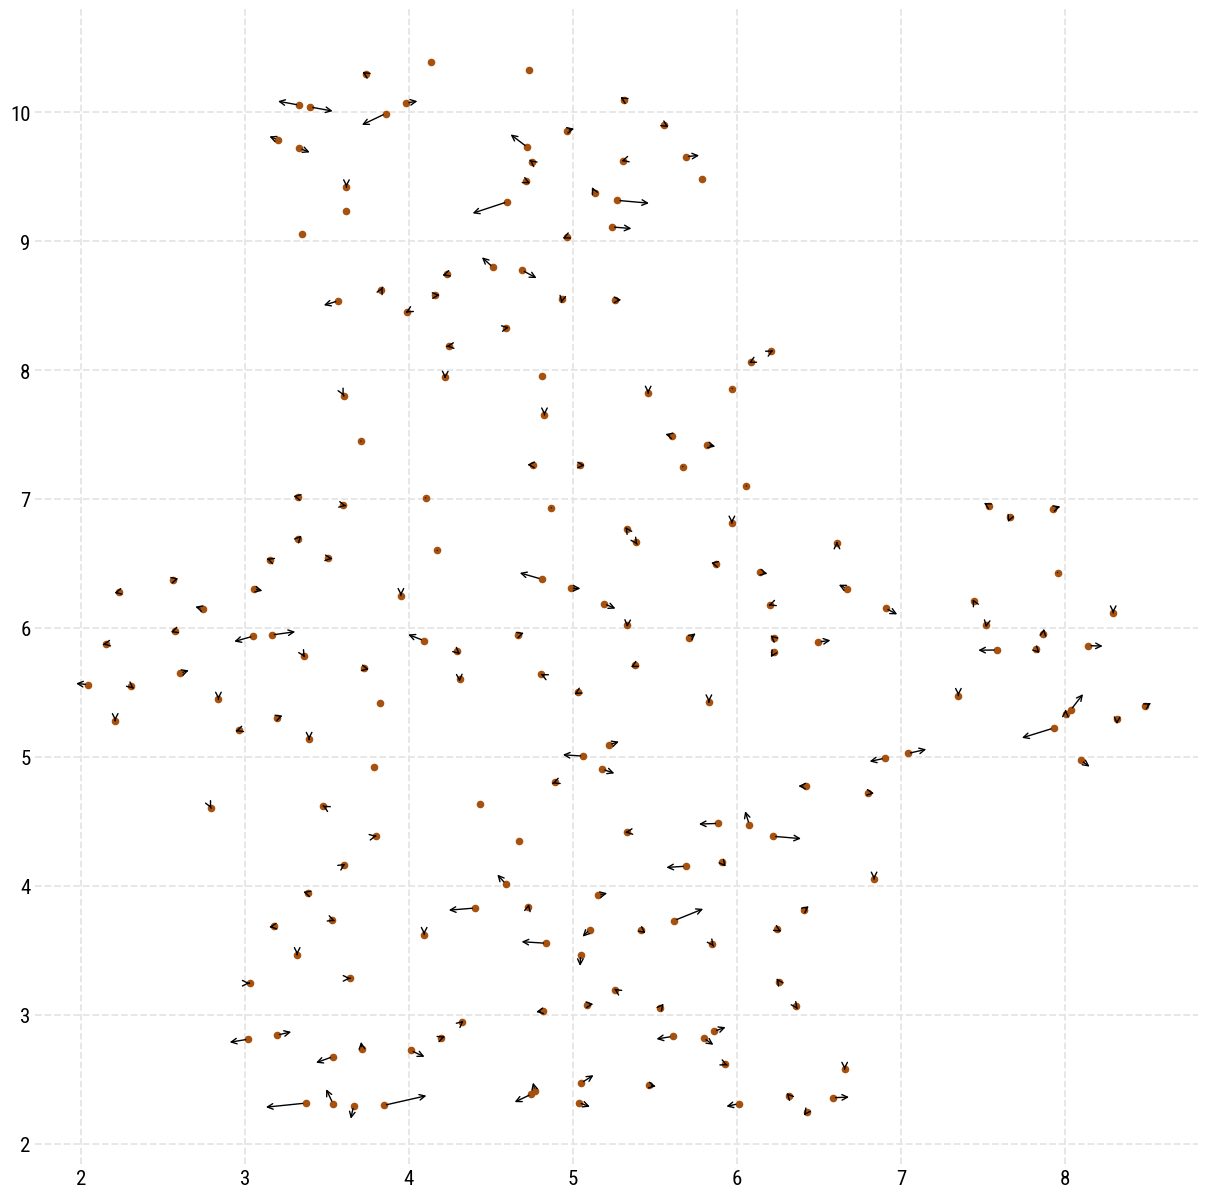

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(data['x'], data['y'], s=20, alpha=1., c='#a7510f')
for i in range(len(data)):
    ax.annotate("", xy=(rectangles_adjusted.loc[i, 'x'], rectangles_adjusted.loc[i, 'y']), xytext=(data.loc[i, 'x'], data.loc[i, 'y']),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.show()

We can also plot an overlay:

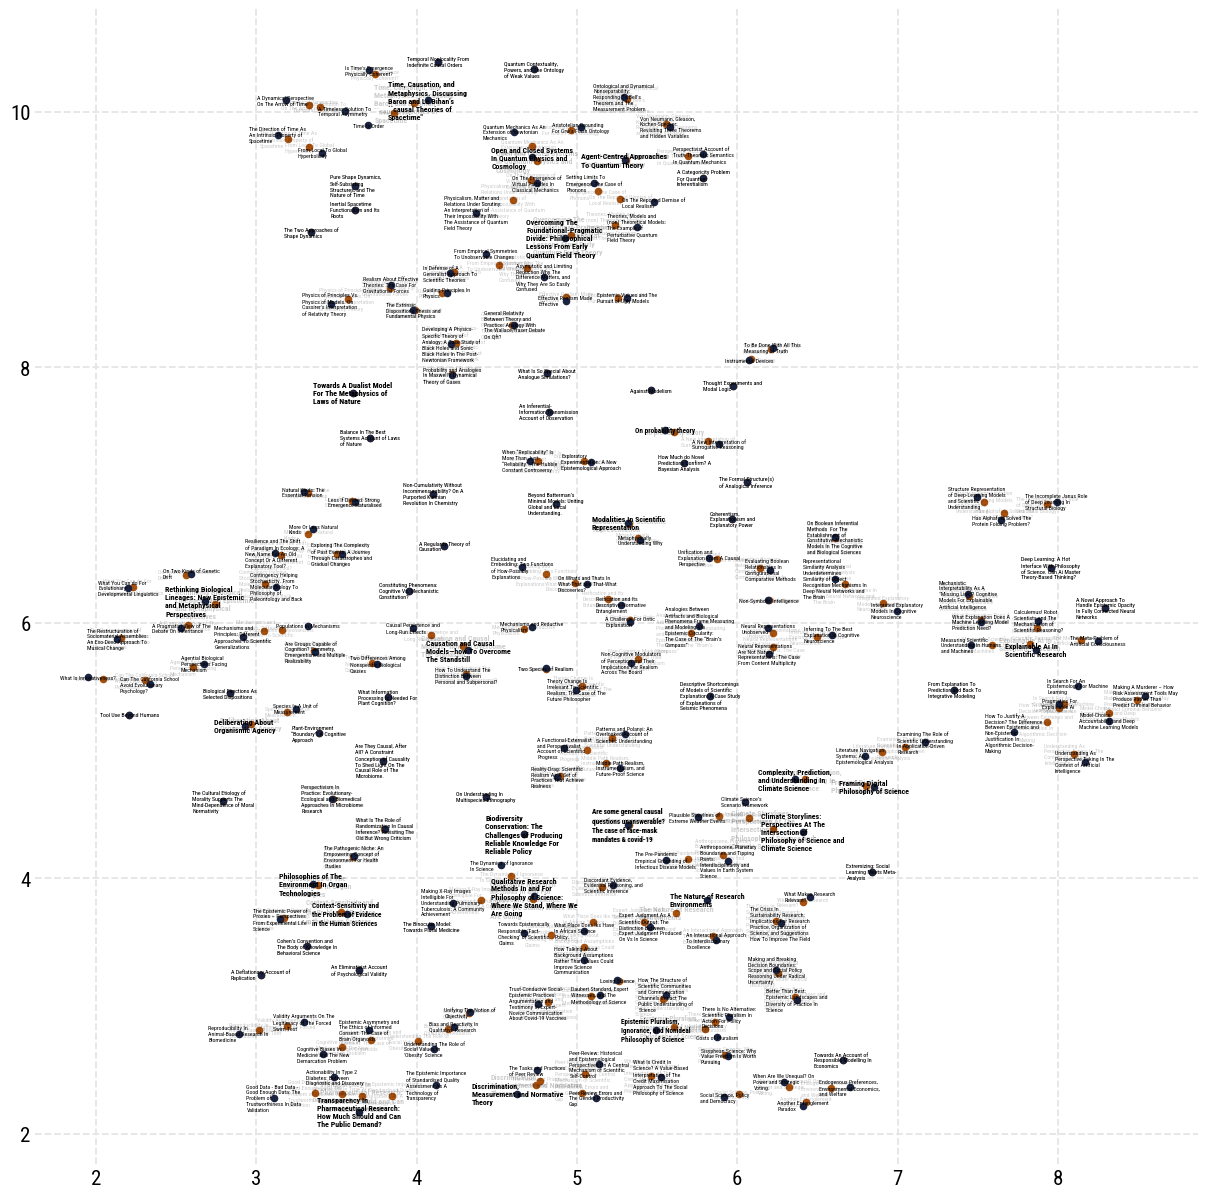

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(data['x'], data['y'], s=20, alpha=1.0, c='#a7510f')
texts = []
for i, row in data.iterrows():
    texts.append(ax.text(row['x'], row['y'], textwrap.fill(row['title'],25) , fontsize=row['fontsize'],fontweight=row['fontweight'],zorder=10,alpha=.2,
                         ha='center',va='center',ma='left'))
    
ax.scatter(rectangles_adjusted['x'], rectangles_adjusted['y'], s=20, alpha=1., c='#1a2340')

    
for i, row in rectangles_adjusted.iterrows():
    texts.append(ax.text(row['x'], row['y'], textwrap.fill(data.iloc[i]['title'],25) , fontsize=data.iloc[i]['fontsize'],
                         ma='left',fontweight=data.iloc[i]['fontweight'],zorder=12,ha='center',va='center'))
    

Finally we can save the adjustment progress as a .gif.

In [9]:
from PIL import Image as IMG


def plot_texts(ax, text_data,coordinates):
    ax.scatter(coordinates['x'], coordinates['y'], s=20, alpha=0, c='#a7510f')
    texts = []
    for i, row in text_data.iterrows():
        texts.append(ax.text(coordinates['x'][i], coordinates['y'][i], textwrap.fill(row['title'], 25),
                             fontsize=row['fontsize'], ha='center',va='center', ma='left', fontweight=row['fontweight'], zorder=10))

def plot_texts_to_gif(text_data,data_list, n, output_filename):
    temp_dir = 'images/temp'
    os.makedirs(temp_dir, exist_ok=True)  # Create the temporary directory
    
    selected_indices = np.linspace(0, len(data_list) - 1, n, dtype=int)
    images = []

    for i in tqdm(selected_indices):
        fig, ax = plt.subplots(figsize=(15,15))
        plot_texts(ax, text_data,data_list[i])
        # ax.axis('off')
        ax.set_xlim([data_list[i]['x'].min() - .1, data_list[i]['x'].max() + .1])
        ax.set_ylim([data_list[i]['y'].min() - .1, data_list[i]['y'].max() + .1])
        plt.tight_layout()
        
        img_path = os.path.join(temp_dir, f'temp_{i}.png')
        plt.savefig(img_path,dpi=90)
        plt.close(fig)
        
        images.append(imageio.imread(img_path))
        #images.append(IMG.open(img_path))

    # Create GIF
    imageio.mimsave(output_filename, images, duration=9, loop=0)

    #images[0].save(output_filename, save_all=True, append_images=images[1:], optimize=False, duration=80, loop=0)

    
    # Clean up: delete the temporary directory and its contents
    shutil.rmtree(temp_dir)

# Example usage
# data_list = [Your list of dataframes each with 'x', 'y', 'title', 'fontsize', 'fontweight' columns]
plot_texts_to_gif(data,optimization_progress_texts + [rectangles_adjusted],n=90, output_filename='images/layout_process_texts.gif')


  0%|          | 0/90 [00:00<?, ?it/s]

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_32001/3546360177.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(img_path))


I'll also compress the gif, so it shows up on PyPI:

In [10]:
import subprocess
import os

def optimize_gif_to_target_size(input_path, output_path, max_file_size, initial_colors=256, optimization_level=3):
    """
    Optimize a GIF file to be under a specific file size.
    
    Args:
    input_path (str): Path to the input GIF file.
    output_path (str): Path to the output optimized GIF file.
    max_file_size (int): Maximum file size in bytes.
    initial_colors (int): Starting number of colors.
    optimization_level (int): Level of optimization by gifsicle.
    """
    colors = initial_colors
    step = max(16, colors // 8)  # Reduce colors in steps, minimum step is 16

    while True:
        # Build the gifsicle command
        command = [
            'gifsicle',
            '-O{}'.format(optimization_level),
            '--colors', str(colors),
            input_path,
            '-o', output_path
        ]
        
        # Execute the command
        subprocess.run(command, check=True)
        file_size = os.path.getsize(output_path)

        print(f"Trying {colors} colors: Output file size is {file_size} bytes")

        # Check if the file size is within the desired limit
        if file_size <= max_file_size:
            print("GIF optimized to target size.")
            break
        elif colors <= 16:
            print("Reached minimum color threshold with no success.")
            break
        else:
            # Decrease the number of colors and try again
            colors -= step
            if colors < 16:
                colors = 16  # Ensure minimum colors is not below 16


optimize_gif_to_target_size('images/layout_process_texts.gif', 'images/layout_process_texts.gif', max_file_size = 4.95 * 1024 * 1024 )


gifsicle: warning: trivial adaptive palette (only 17 colors in source)


Trying 256 colors: Output file size is 2980518 bytes
GIF optimized to target size.


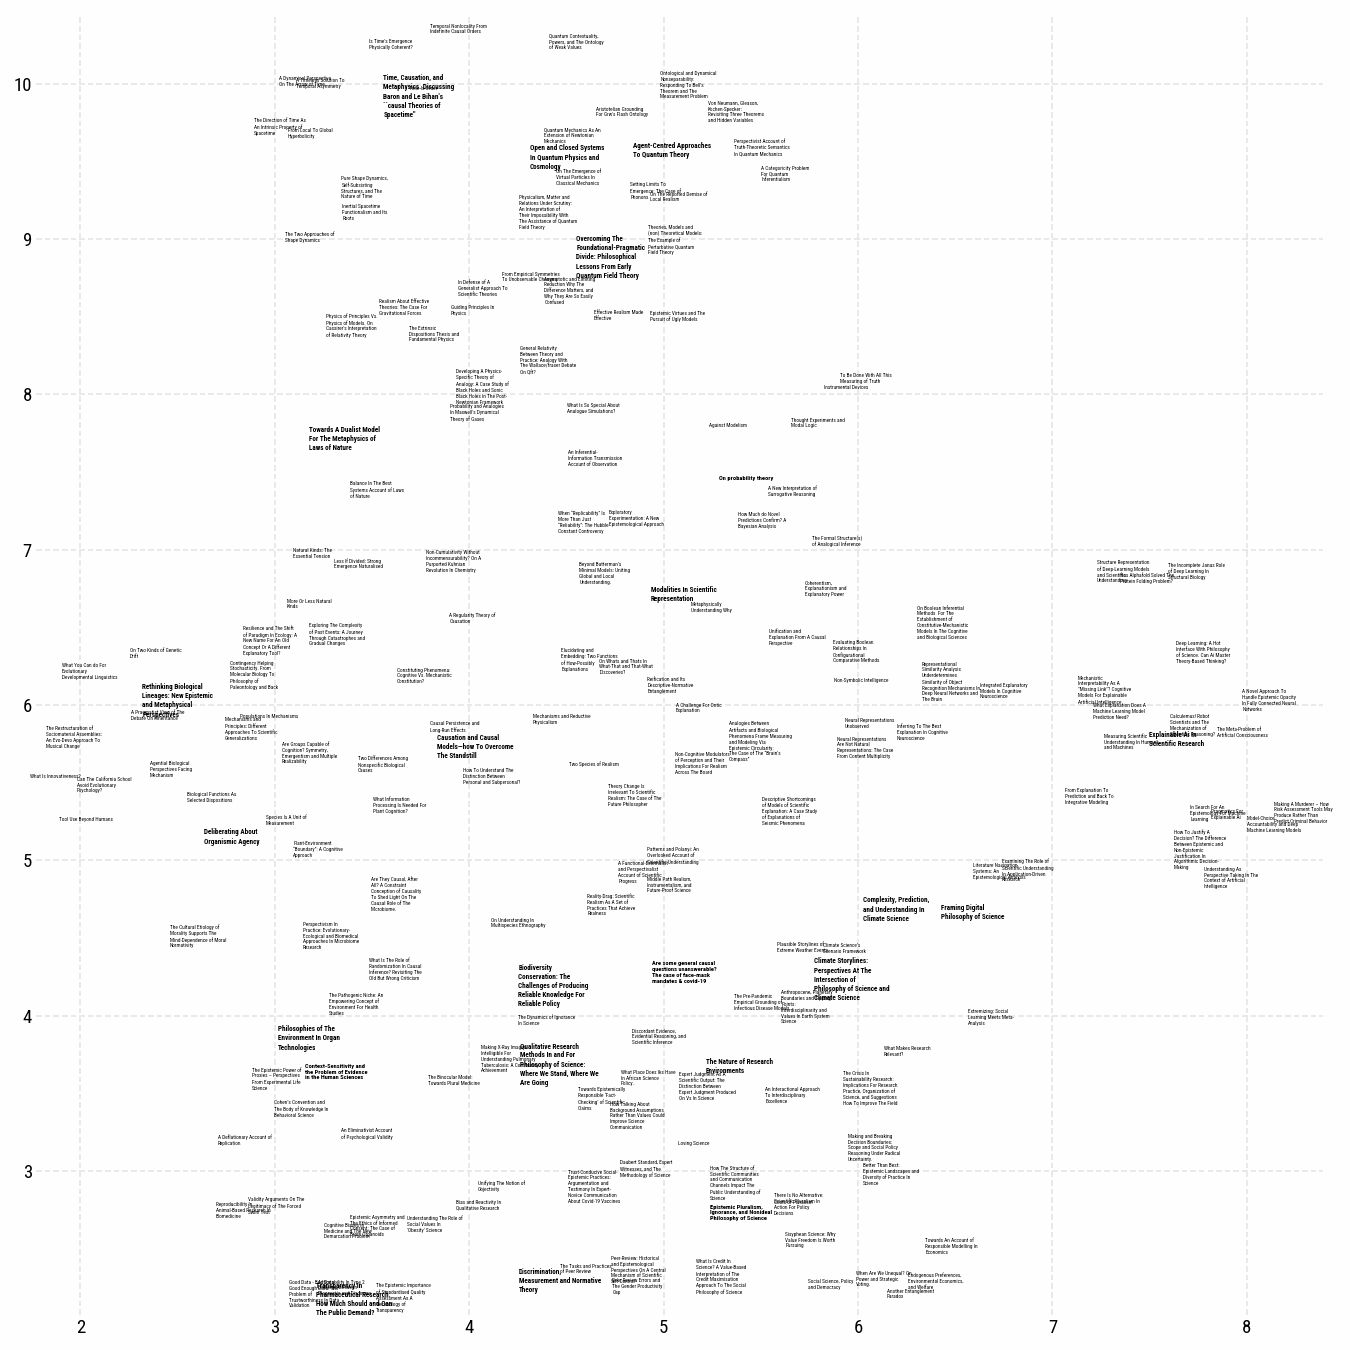

In [11]:
display(Image(filename='images/layout_process_texts.gif'))


# Example2: Adjust rectangles directly
This time we load some example data of images layed out with UMAP. (Were going to visualize them with vikus-viewer later...)

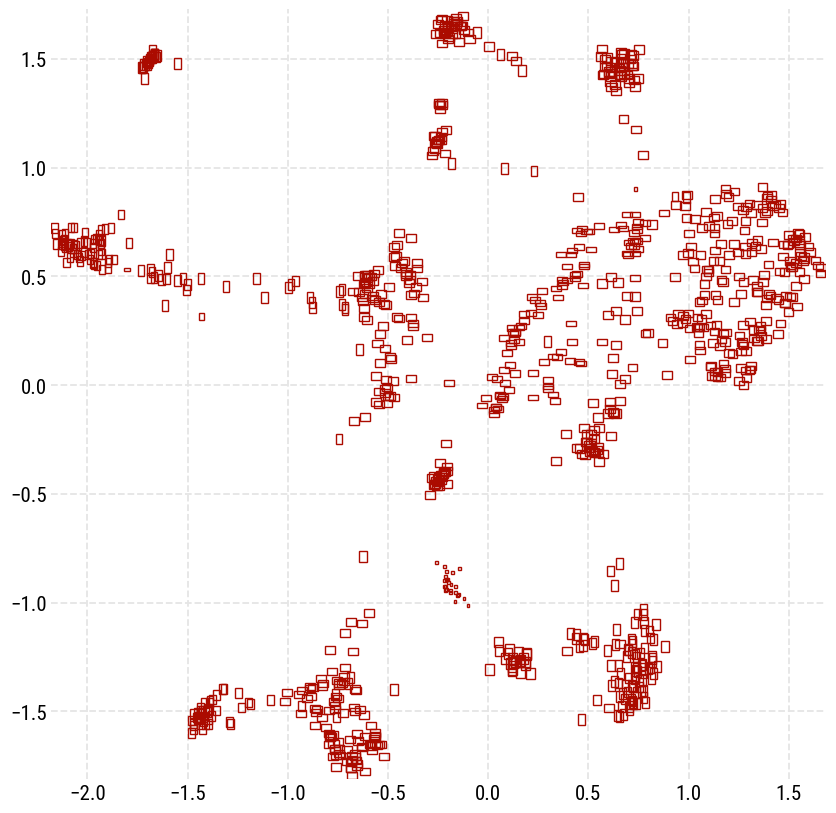

In [12]:
data = pd.read_csv("data/vsz_image_map.csv")


fig, ax = plt.subplots(figsize=(10,10))
plot_rectangles(ax,data,color= '#ab0b00')
plt.show()

Now we run the adjustmnet algorithm on the rectangles data directly: 

In [16]:
rectangles_adjusted, optimization_process = adjust_labels(data,
                                  
                                  #  speed=.01,
                                    adjust_by_size=True,
                                    radius_scale=1.1,
                                    max_iterations=250,
                                    margin=4.5,
                                    margin_type='percentage',
                                    return_optimization_process=True)


  0%|          | 0/250 [00:00<?, ?it/s]

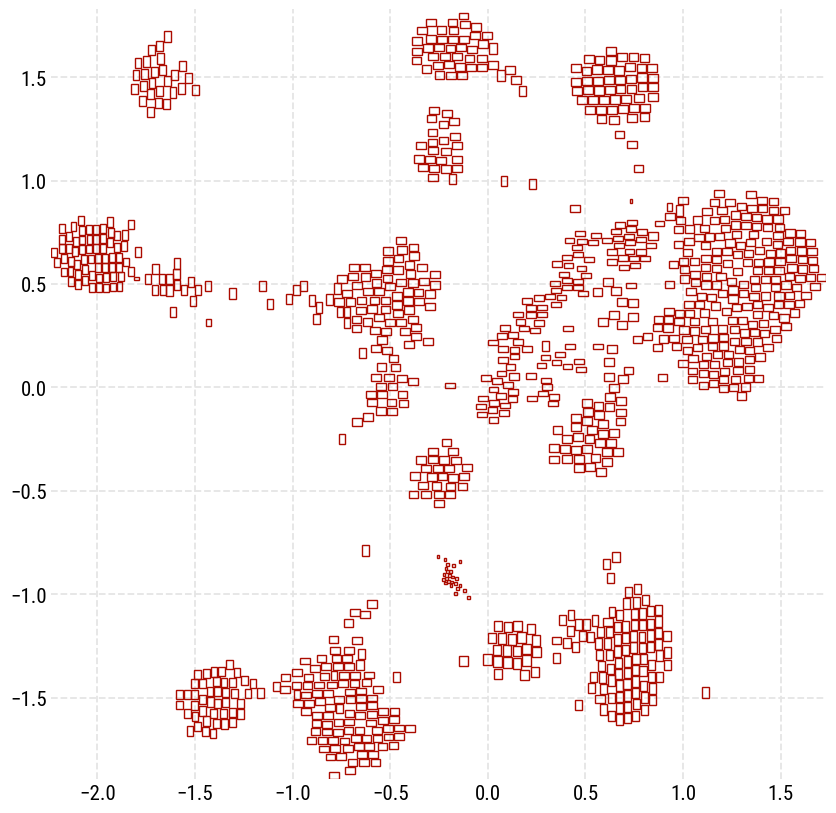

In [17]:


fig, ax = plt.subplots(figsize=(10,10))
plot_rectangles(ax,rectangles_adjusted,color= '#ab0b00')
plt.show()

In [19]:
import imageio

def plot_rectangles_to_gif(rectangles_adjusted_list, n, output_filename):
    temp_dir = 'images/temp'
    os.makedirs(temp_dir, exist_ok=True)  # Create the temporary directory
    
    selected_indices = np.linspace(0, len(rectangles_adjusted_list) - 1, n, dtype=int)
    images = []

    for i in tqdm(selected_indices):
        fig, ax = plt.subplots(figsize=(10,10))
        plot_rectangles(ax, rectangles_adjusted_list[i],color= '#ab0b00')
        # plt.axis('off')
        plt.tight_layout()
        ax.set_xlim([rectangles_adjusted_list[i]['x'].min() - .3, rectangles_adjusted_list[i]['x'].max() + .3])
        ax.set_ylim([rectangles_adjusted_list[i]['y'].min() - .3, rectangles_adjusted_list[i]['y'].max() + .3])
        img_path = os.path.join(temp_dir, f'temp_{i}.png')  # Use os.path.join for path construction
        plt.savefig(img_path)
        plt.close(fig)
        
        images.append(imageio.imread(img_path))

    # Create GIF
    imageio.mimsave(output_filename, images, duration=14, loop=0)
    
    # Clean up: delete the temporary directory and its contents
    shutil.rmtree(temp_dir)


# Example usage
plot_rectangles_to_gif(optimization_process+[rectangles_adjusted], n=100, output_filename='images/layout_process_rectangles.gif')
optimize_gif_to_target_size('images/layout_process_rectangles.gif', 'images/layout_process_rectangles.gif', max_file_size = 4.95 * 1024 * 1024 )


  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_32001/2444371926.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(img_path))
gifsicle: warning: trivial adaptive palette (only 196 colors in source)


Trying 256 colors: Output file size is 1827494 bytes
GIF optimized to target size.


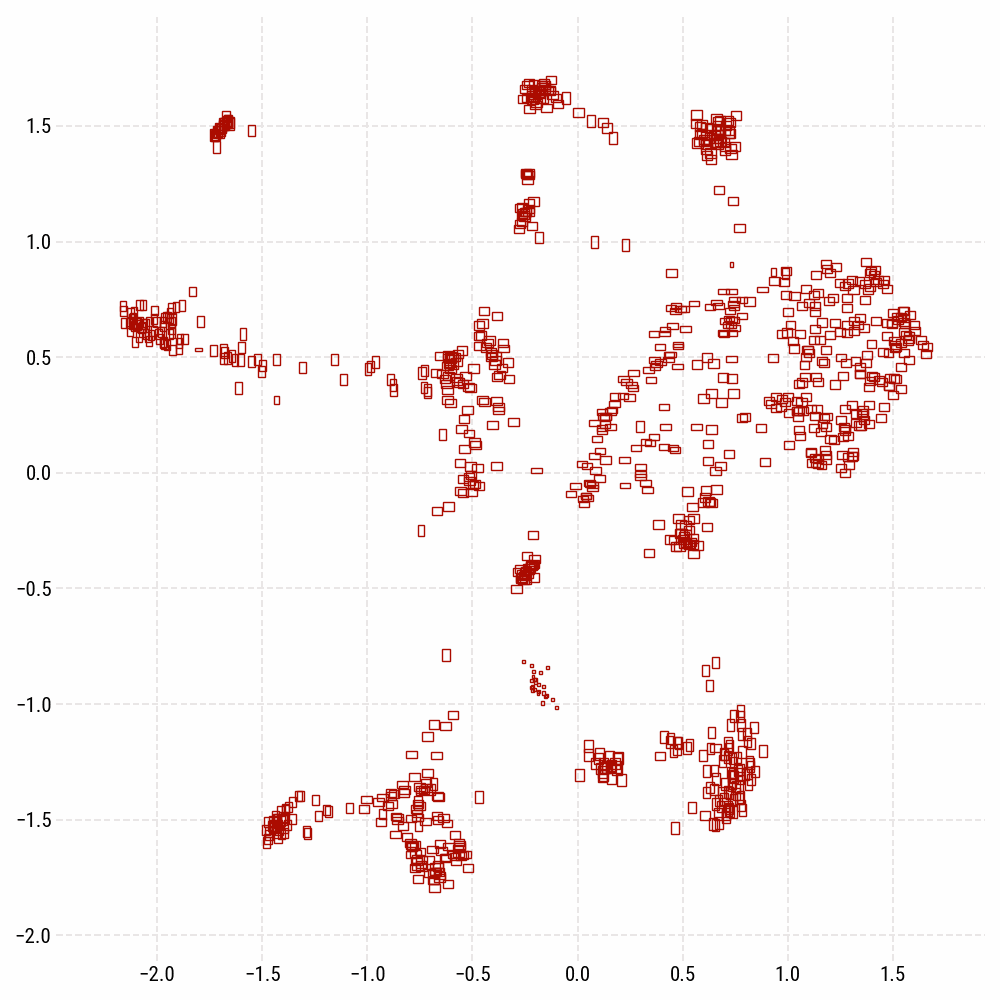

In [21]:

display(Image(filename='images/layout_process_rectangles.gif'))
